### 4.10 Part1 

### 4.10-1 Importing libraries and df

In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

In [8]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','491_concat.pkl'))

### 4.10-2 Adressing any PII data in the data before continuing the analysis

In [9]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'Full_Name', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'order_id', 'eval_set',
       'order_number', 'day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest days', 'max_order',
       'loyalty_flag', 'mean_price', 'spender_flag', 'median_days_sinse_ord',
       'frequent_flag'],
      dtype='object')

In [10]:
df.shape

(32641268, 31)

### creating df without PII data (escluding Full_Name). Note: I don't create a subset because I need all colums axsept only one

In [11]:
del df['Full_Name']

In [12]:
df.shape

(32641268, 30)

In [13]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

#### exporting df ready for analysis to save it

In [9]:
df.to_pickle(os.path.join(path,'Prepared Data','for_analysis410.pkl'))

### 4.10-3 creating df with STATE and spender flag only to avoide Memory Error

In [25]:
df1=df[['STATE','spender_flag']]

In [30]:
df1.shape

(32641268, 2)

### 4.10-3 Comparing customer behavior in different geographic areas. Creating a regional segmentation of the data 

#### filter df by region-Northest

In [40]:
desig=['Maine','New Hampshire','Vermont',
                     'Massachusetts', 'Rhode Island','Connecticut','New York',
                      'Pennsylvania','New Jersey']
df_Northest=df1[df1['STATE'].isin(desig)]

In [42]:
df_Northest.shape

(5764832, 2)

#### filter df by region-Midwest

In [43]:
desig1=['Wisconsin','Michigan','Illinois','Indiana','Ohio',
'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
df_Midwest=df1[df1['STATE'].isin(desig1)]

In [44]:
df_Midwest.shape

(7652535, 2)

#### filter df by region- South

In [45]:
desig2=['Delaware','Maryland','District of Columbia','Virginia',
'West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky',
'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
df_South=df1[df1['STATE'].isin(desig2)]

In [46]:
df_South.shape

(10870719, 2)

#### filter df by region- WEst

In [47]:
desig3=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona',
               'New Mexico','Alaska','Washington','Oregon','California','Hawaii']
df_West=df1[df1['STATE'].isin(desig3)]

In [53]:
df_West.shape

(8353182, 2)

#### check the rows total number

In [56]:
df_West.shape[0]+df_South.shape[0]+df_Midwest.shape[0]+df_Northest.shape[0]

32641268

#### 4.10-3-1 Creating a “Region” column based on the “State” column from customers data set

##### Unfortunately apply function runs very slow. I havn't got any result in some hours. Therefore I devidet df in regionspart to analyse one by one

#### 4.10.3-2 Determining whether there’s a difference in spending habits between the different U.S. regions. 

#### Creating the visualisation

In [57]:
##### importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

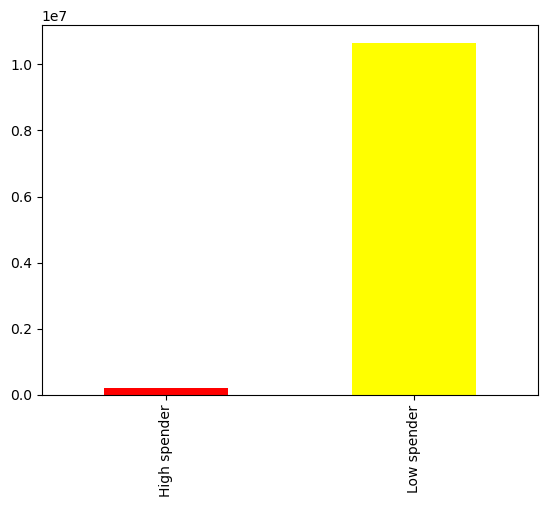

In [60]:
bar_South=df_South['spender_flag'].value_counts().sort_index().plot.bar(color=['red','yellow','blueviolet'])

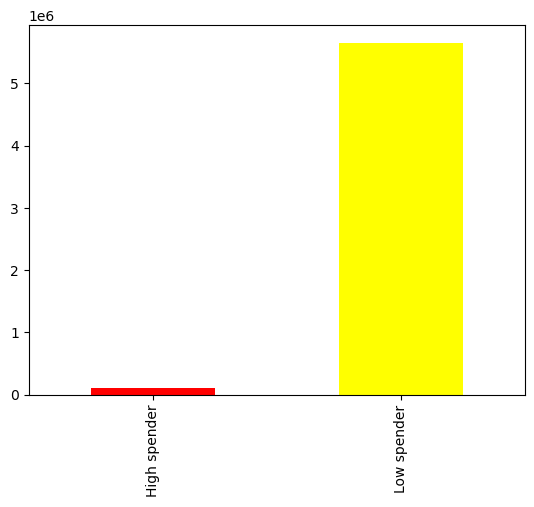

In [61]:
bar_Northest=df_Northest['spender_flag'].value_counts().sort_index().plot.bar(color=['red','yellow','blueviolet'])

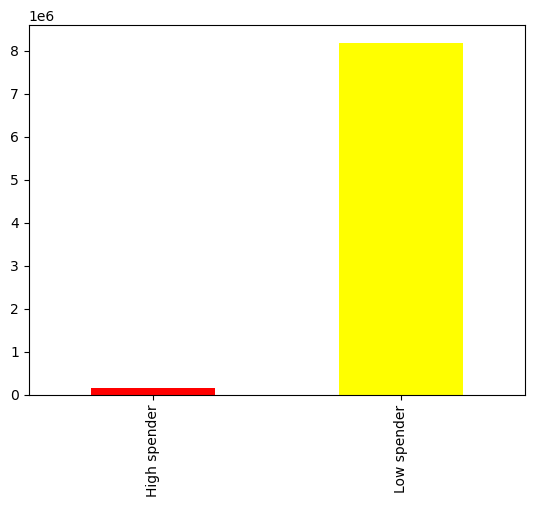

In [62]:
bar_West=df_West['spender_flag'].value_counts().sort_index().plot.bar(color=['red','yellow','blueviolet'])

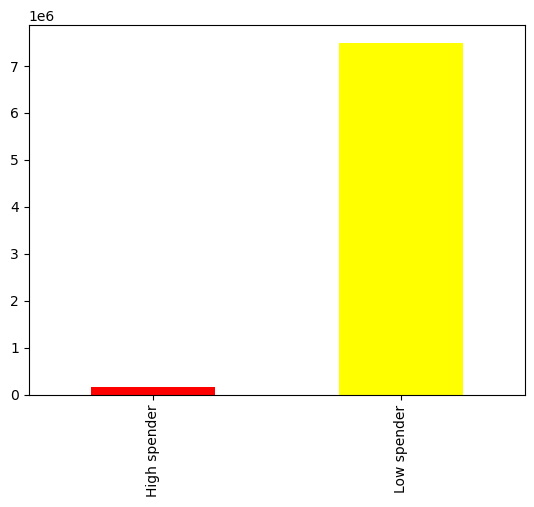

In [63]:
bar_Midwest=df_Midwest['spender_flag'].value_counts().sort_index().plot.bar(color=['red','yellow','blueviolet'])

### it seems the ratio between High spender and Low spender is the same in all regions. To see the possible difference in High spender by region let's analyse this part of df

#### filtring to became High Spender data only , adding name of region and concatenating the data to get united df to analyse

In [65]:
df_South_HS=df_South[df_South['spender_flag']=='High spender']

In [66]:
df_South_HS.insert(1,'Region', "South")

In [67]:
df_South_HS.head(5)

,STATE,Region,spender_flag
6814,Kentucky,South,High spender
6815,Kentucky,South,High spender
6816,Kentucky,South,High spender
6817,Kentucky,South,High spender
6818,Kentucky,South,High spender


In [80]:
df_South_HS.shape

(212055, 3)

In [69]:
df_West_HS=df_West[df_West['spender_flag']=='High spender']

In [70]:
df_West_HS.insert(1,'Region', "West")

In [77]:
df_West_HS.shape

(162216, 3)

In [71]:
df_Northest_HS=df_Northest[df_Northest['spender_flag']=='High spender']

In [72]:
df_Northest_HS.insert(1,'Region', "Northest")

In [78]:
df_Northest_HS.shape

(109234, 3)

In [73]:
df_Midwest_HS=df_Midwest[df_Midwest['spender_flag']=='High spender']

In [74]:
df_Midwest_HS.insert(1,'Region', "Midwest")

In [79]:
df_Midwest_HS.shape

(157410, 3)

####-- checking

In [81]:
df_West_HS.shape[0]+df_South_HS.shape[0]+df_Midwest_HS.shape[0]+df_Northest_HS.shape[0]

640915

#### --- concatenating one under one

In [75]:
df_HS=pd.concat([df_West_HS,df_Northest_HS, df_Midwest_HS,df_South_HS], ignore_index=True)

In [76]:
df_HS.shape

(640915, 3)

#### ---creating visualisation of HS by region

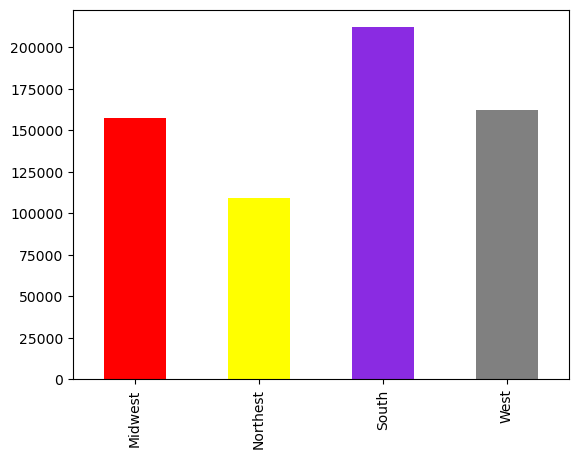

In [82]:
bar_HS=df_HS['Region'].value_counts().sort_index().plot.bar(color=['red','yellow','blueviolet','gray'])

#### The plot shows South Region is leading by High spenders although the total number of orders is the lowest among the regions.